# <b>1 <span style='color:#78D118'>|</span> Introduction</b>
![](http://www.isaaa.org/kc/cropbiotechupdate/files/images/9252019125259AM.jpg)

### What to Expect?
In this notebook I'm gonna be using Transfer Learning MobileNetv2 by Keras to make a classification model for our dataset.

### Dataset Overview
This dataset includes 5 different rice types images with 15000 images for every category. And our task is to make a classification model that could correctly predict the 5 kinds of rice.

#### Rice Types
* Arborio
* Basmati
* Ipsala
* Jasmine
* Karacadag

# <b>2 <span style='color:#78D118'>|</span> Preparing the Data</b>

In [1]:
# Importing necessary libraries

# Building deep learning models
import tensorflow as tf 
from tensorflow import keras 
# For accessing pre-trained models
import tensorflow_hub as hub 
# For separating train and test sets
from sklearn.model_selection import train_test_split

# For visualizations
import matplotlib.pyplot as plt
import matplotlib.image as img
import PIL.Image as Image
import cv2

import os
import numpy as np
import pathlib

**Preparing our dataset**

In [2]:
data_dir = "../input/rice-image-dataset/Rice_Image_Dataset" # Datasets path
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('../input/rice-image-dataset/Rice_Image_Dataset')

**Separating the categories**

In [3]:
arborio = list(data_dir.glob('Arborio/*'))[:600]
basmati = list(data_dir.glob('Basmati/*'))[:600]
ipsala = list(data_dir.glob('Ipsala/*'))[:600]
jasmine = list(data_dir.glob('Jasmine/*'))[:600]
karacadag = list(data_dir.glob('Karacadag/*'))[:600]

**Checking samples**

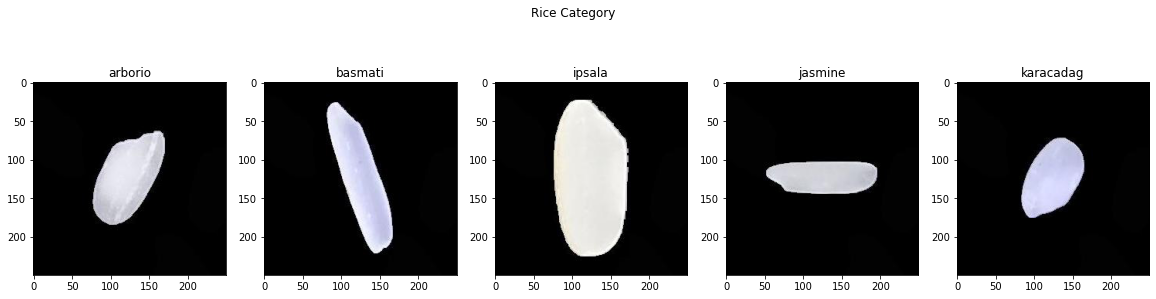

In [4]:
fig, ax = plt.subplots(ncols=5, figsize=(20,5))
fig.suptitle('Rice Category')
arborio_image = img.imread(arborio[0])
basmati_image = img.imread(basmati[0])
ipsala_image = img.imread(ipsala[0])
jasmine_image = img.imread(jasmine[0])
karacadag_image = img.imread(karacadag[0])

ax[0].set_title('arborio')
ax[1].set_title('basmati')
ax[2].set_title('ipsala')
ax[3].set_title('jasmine')
ax[4].set_title('karacadag')


ax[0].imshow(arborio_image)
ax[1].imshow(basmati_image)
ax[2].imshow(ipsala_image)
ax[3].imshow(jasmine_image)
ax[4].imshow(karacadag_image)

**Assigning a separate dictionary for images and their corresponding labels**

In [5]:
# Contains the images path
df_images = {
    'arborio' : arborio,
    'basmati' : basmati,
    'ipsala' : ipsala,
    'jasmine' : jasmine,
    'karacadag': karacadag
}

# Contains numerical labels for the categories
df_labels = {
    'arborio' : 0,
    'basmati' : 1,
    'ipsala' : 2,
    'jasmine' : 3,
    'karacadag': 4
}

**Since the MobileNetv2 training images dimensions are 224 by 224 by 3, we have to reshape our categories into that**

In [6]:
img = cv2.imread(str(df_images['arborio'][0])) # Converting it into numerical arrays
img.shape # Its currently 250 by 250 by 3

(250, 250, 3)

In [7]:
X, y = [], [] # X = images, y = labels
for label, images in df_images.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (224, 224)) # Resizing the images to be able to pass on MobileNetv2 model
        X.append(resized_img) 
        y.append(df_labels[label])

**Splitting the data and standarization**

In [8]:
# Standarizing
X = np.array(X)
X = X/255
y = np.array(y)

In [9]:
# Separating data into training, test and validation sets
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val)

# <b>3 <span style='color:#78D118'>|</span> Creating the Model</b>

In [10]:
mobile_net = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4' # MobileNetv4 link
mobile_net = hub.KerasLayer(
        mobile_net, input_shape=(224,224, 3), trainable=False) # Removing the last layer

In [11]:
num_label = 5 # number of labels

model = keras.Sequential([
    mobile_net,
    keras.layers.Dense(num_label)
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


# <b>4 <span style='color:#78D118'>|</span> Training the Model</b>

In [12]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])


history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
71/71 [==============================] - 13s 46ms/step - loss: 0.5393 - acc: 0.8453 - val_loss: 0.1993 - val_acc: 0.9681
Epoch 2/10
71/71 [==============================] - 2s 31ms/step - loss: 0.1606 - acc: 0.9640 - val_loss: 0.1244 - val_acc: 0.9787
Epoch 3/10
71/71 [==============================] - 2s 31ms/step - loss: 0.1143 - acc: 0.9707 - val_loss: 0.1169 - val_acc: 0.9734
Epoch 4/10
71/71 [==============================] - 2s 33ms/step - loss: 0.0901 - acc: 0.9751 - val_loss: 0.0799 - val_acc: 0.9894
Epoch 5/10
71/71 [==============================] - 2s 31ms/step - loss: 0.0783 - acc: 0.9809 - val_loss: 0.0744 - val_acc: 0.9734
Epoch 6/10
71/71 [==============================] - 2s 31ms/step - loss: 0.0625 - acc: 0.9840 - val_loss: 0.0715 - val_acc: 0.9840
Epoch 7/10
71/71 [==============================] - 2s 33ms/step - loss: 0.0576 - acc: 0.9862 - val_loss: 0.0559 - val_acc: 0.9947
Epoch 8/10
71/71 [==============================] - 2s 31ms/step - loss: 0.0509 - 

# <b>5 <span style='color:#78D118'>|</span> Evaluate the Model</b>

#### I've evaluated the model using accuracy, recall, precision and f1-score

In [13]:
model.evaluate(X_test,y_test)

18/18 [==============================] - 1s 34ms/step - loss: 0.0733 - acc: 0.9822


[0.07331586629152298, 0.982206404209137]

In [14]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

9/9 [==============================] - 1s 62ms/step
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       123
           1       0.99      0.96      0.98       109
           2       1.00      1.00      1.00       112
           3       0.96      0.98      0.97       108
           4       1.00      0.96      0.98       110

    accuracy                           0.98       562
   macro avg       0.98      0.98      0.98       562
weighted avg       0.98      0.98      0.98       562



# <b>6 <span style='color:#78D118'>|</span> Visualizing the Model</b>
#### On how the models accuracy and loss changed through-out the 5 epochs

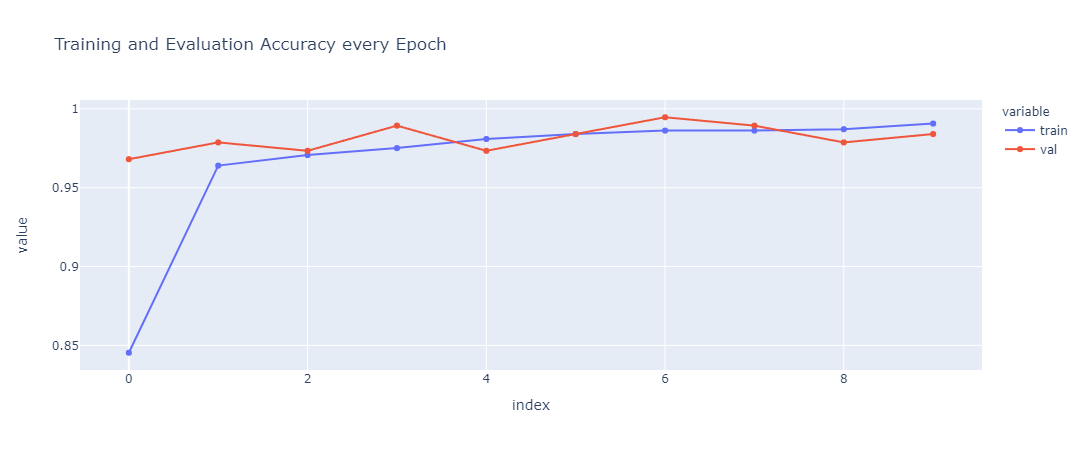

In [15]:
from plotly.offline import iplot, init_notebook_mode
import plotly.express as px
import pandas as pd

init_notebook_mode(connected=True)

acc = pd.DataFrame({'train': history.history['acc'], 'val': history.history['val_acc']})

fig = px.line(acc, x=acc.index, y=acc.columns[0::], title='Training and Evaluation Accuracy every Epoch', markers=True)
fig.show()

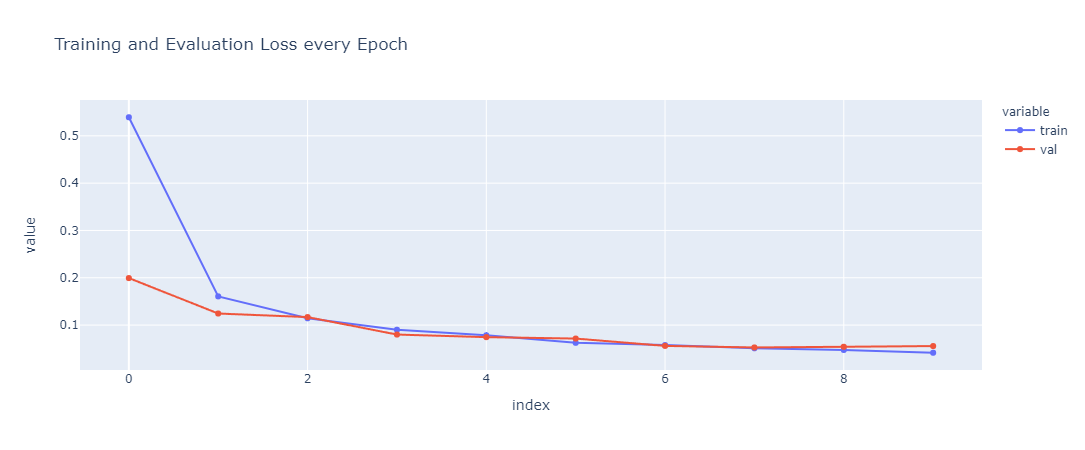

In [16]:
loss = pd.DataFrame({'train': history.history['loss'], 'val': history.history['val_loss']})

fig = px.line(loss, x=loss.index, y=loss.columns[0::], title='Training and Evaluation Loss every Epoch', markers=True)
fig.show()